In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dv dataset.csv to dv dataset (1).csv


In [ ]:
df = pd.read_csv('dv dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,time,overall,housing,apparel,transportation,medical,food,other_goods,education,recreation
0,0,1995-01-01 00:00:00,150.3,146.4,129.4,4.3,4.9,147.5,203.0,5.8,1.5
1,1,1995-02-01 00:00:00,150.9,147.0,131.1,4.2,4.9,147.4,204.1,6.0,1.5
2,2,1995-03-01 00:00:00,151.4,147.4,134.4,4.4,4.8,147.4,204.0,5.9,1.4
3,3,1995-04-01 00:00:00,151.9,147.4,134.8,4.9,4.6,148.4,204.3,5.9,1.8
4,4,1995-05-01 00:00:00,152.2,147.6,133.4,5.6,4.6,148.3,204.9,5.7,1.9


# Data Processesing

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
time,0
overall,3
housing,3
apparel,3
transportation,3
medical,3
food,3
other_goods,3
education,3


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
time,0
overall,0
housing,0
apparel,0
transportation,0
medical,0
food,0
other_goods,0
education,0


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 0 to 320
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      321 non-null    int64  
 1   time            321 non-null    object 
 2   overall         321 non-null    float64
 3   housing         321 non-null    float64
 4   apparel         321 non-null    float64
 5   transportation  321 non-null    float64
 6   medical         321 non-null    float64
 7   food            321 non-null    float64
 8   other_goods     321 non-null    float64
 9   education       321 non-null    float64
 10  recreation      321 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 30.1+ KB
None


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
print(df.head())

                  time  overall  housing  apparel  transportation  medical  \
0  1995-01-01 00:00:00    150.3    146.4    129.4             4.3      4.9   
1  1995-02-01 00:00:00    150.9    147.0    131.1             4.2      4.9   
2  1995-03-01 00:00:00    151.4    147.4    134.4             4.4      4.8   
3  1995-04-01 00:00:00    151.9    147.4    134.8             4.9      4.6   
4  1995-05-01 00:00:00    152.2    147.6    133.4             5.6      4.6   

    food  other_goods  education  recreation  
0  147.5        203.0        5.8         1.5  
1  147.4        204.1        6.0         1.5  
2  147.4        204.0        5.9         1.4  
3  148.4        204.3        5.9         1.8  
4  148.3        204.9        5.7         1.9  


In [ ]:
df['time'] = pd.to_datetime(df['time'])

df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

print(df[['time','year','month']].head())

        time  year  month
0 1995-01-01  1995      1
1 1995-02-01  1995      2
2 1995-03-01  1995      3
3 1995-04-01  1995      4
4 1995-05-01  1995      5


In [ ]:
df.head()

,time,overall,housing,apparel,transportation,medical,food,other_goods,education,recreation,year,month
0,1995-01-01,150.3,146.4,129.4,4.3,4.9,147.5,203.0,5.8,1.5,1995,1
1,1995-02-01,150.9,147.0,131.1,4.2,4.9,147.4,204.1,6.0,1.5,1995,2
2,1995-03-01,151.4,147.4,134.4,4.4,4.8,147.4,204.0,5.9,1.4,1995,3
3,1995-04-01,151.9,147.4,134.8,4.9,4.6,148.4,204.3,5.9,1.8,1995,4
4,1995-05-01,152.2,147.6,133.4,5.6,4.6,148.3,204.9,5.7,1.9,1995,5


In [ ]:
from sklearn.preprocessing import MinMaxScaler

features_to_scale = ['housing', 'apparel', 'transportation', 'medical', 'food', 'other_goods', 'education', 'recreation']

scaler = MinMaxScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(df[features_to_scale].head())

    housing   apparel  transportation   medical      food  other_goods  \
0  0.000000  0.703540        0.519553  0.938776  0.000746     0.000000   
1  0.004369  0.778761        0.516760  0.938776  0.000000     0.003978   
2  0.007281  0.924779        0.522346  0.918367  0.000000     0.003616   
3  0.007281  0.942478        0.536313  0.877551  0.007457     0.004701   
4  0.008737  0.880531        0.555866  0.877551  0.006711     0.006871   

   education  recreation  
0   0.769231    0.583333  
1   0.800000    0.583333  
2   0.784615    0.562500  
3   0.784615    0.645833  
4   0.753846    0.666667  


In [ ]:
df['CPI_lag_1'] = df['overall'].shift(1)
df['CPI_lag_3'] = df['overall'].shift(3)
df['CPI_lag_6'] = df['overall'].shift(6)

print(df[['overall', 'CPI_lag_1', 'CPI_lag_3', 'CPI_lag_6']].head(7))


   overall  CPI_lag_1  CPI_lag_3  CPI_lag_6
0    150.3        NaN        NaN        NaN
1    150.9      150.3        NaN        NaN
2    151.4      150.9        NaN        NaN
3    151.9      151.4      150.3        NaN
4    152.2      151.9      150.9        NaN
5    152.5      152.2      151.4        NaN
6    152.5      152.5      151.9      150.3


In [ ]:

df['CPI_rolling_mean_3'] = df['overall'].rolling(window=3).mean()
df['CPI_rolling_mean_6'] = df['overall'].rolling(window=6).mean()

print(df[['overall', 'CPI_rolling_mean_3', 'CPI_rolling_mean_6']].head(7))


   overall  CPI_rolling_mean_3  CPI_rolling_mean_6
0    150.3                 NaN                 NaN
1    150.9                 NaN                 NaN
2    151.4          150.866667                 NaN
3    151.9          151.400000                 NaN
4    152.2          151.833333                 NaN
5    152.5          152.200000          151.533333
6    152.5          152.400000          151.900000


In [ ]:
df.dropna(inplace=True)
print(df.head(7))

         time  overall   housing   apparel  transportation   medical  \
6  1995-07-01    152.5  0.020387  0.654867        0.513966  0.836735   
7  1995-08-01    152.9  0.023299  0.734513        0.466480  0.836735   
8  1995-09-01    153.2  0.022571  0.849558        0.458101  0.836735   
9  1995-10-01    153.7  0.024027  0.929204        0.466480  0.795918   
10 1995-11-01    153.6  0.021843  0.893805        0.446927  0.775510   
11 1995-12-01    153.5  0.024027  0.756637        0.441341  0.734694   
12 1996-01-01    154.4  0.030580  0.730088        0.452514  0.755102   

        food  other_goods  education  recreation  year  month  CPI_lag_1  \
6   0.005220     0.009764   0.738462    0.625000  1995      7      152.5   
7   0.007457     0.016997   0.784615    0.729167  1995      8      152.5   
8   0.011185     0.026037   0.738462    0.770833  1995      9      152.9   
9   0.014914     0.027846   0.723077    0.770833  1995     10      153.2   
10  0.014914     0.029654   0.723077    0.7

In [ ]:
df.shape

(315, 17)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['overall', 'time'])
y = df['overall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(252, 15)
(63, 15)
(252,)
(63,)


# EDA

In [ ]:
df.describe()

,time,overall,housing,apparel,transportation,medical,food,other_goods,education,recreation,year,month,CPI_lag_1,CPI_lag_3,CPI_lag_6,CPI_rolling_mean_3,CPI_rolling_mean_6
count,315,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,2008-07-31 17:54:17.142857216,209.186327,0.461842,0.493822,0.454483,0.639132,0.464860,0.523373,0.573578,0.497950,2008.123810,6.514286,208.799629,208.029883,206.901803,208.800097,208.225103
min,1995-07-01 00:00:00,152.500000,0.020387,0.000000,0.000000,0.000000,0.005220,0.009764,0.000000,0.000000,1995.000000,1.000000,152.500000,151.900000,150.300000,152.400000,151.900000
25%,2002-01-16 12:00:00,178.150000,0.231899,0.330907,0.364525,0.510204,0.211773,0.310460,0.400000,0.395833,2002.000000,4.000000,177.900000,177.700000,177.450000,177.816667,177.691667
50%,2008-08-01 00:00:00,213.240000,0.505366,0.474115,0.452514,0.653061,0.514682,0.520712,0.630769,0.500000,2008.000000,7.000000,212.709000,212.193000,211.080000,213.075333,212.965333
75%,2015-02-15 00:00:00,237.384500,0.654018,0.668075,0.540503,0.795918,0.736388,0.756953,0.753846,0.583333,2015.000000,9.000000,237.223500,236.994000,236.409000,237.219000,237.098000
max,2021-09-01 00:00:00,274.310000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2021.000000,12.000000,273.567000,271.696000,264.877000,273.626667,271.470833
std,NaN,33.547784,0.267262,0.239752,0.162608,0.195620,0.279807,0.279160,0.237364,0.178171,7.598645,3.445058,33.496726,33.398539,33.308988,33.492536,33.415627


In [ ]:
print(df.info)

<bound method DataFrame.info of           time  overall   housing   apparel  transportation   medical  \
6   1995-07-01  152.500  0.020387  0.654867        0.513966  0.836735   
7   1995-08-01  152.900  0.023299  0.734513        0.466480  0.836735   
8   1995-09-01  153.200  0.022571  0.849558        0.458101  0.836735   
9   1995-10-01  153.700  0.024027  0.929204        0.466480  0.795918   
10  1995-11-01  153.600  0.021843  0.893805        0.446927  0.775510   
..         ...      ...       ...       ...             ...       ...   
316 2021-05-01  269.195  0.962896  0.329690        0.958101  0.122449   
317 2021-06-01  271.696  0.975405  0.301947        1.000000  0.020408   
318 2021-07-01  273.003  0.984419  0.246814        0.941341  0.000000   
319 2021-08-01  273.567  0.990149  0.340442        0.896648  0.020408   
320 2021-09-01  274.310  1.000000  0.438319        0.863128  0.020408   

         food  other_goods  education  recreation  year  month  CPI_lag_1  \
6    0.005220 

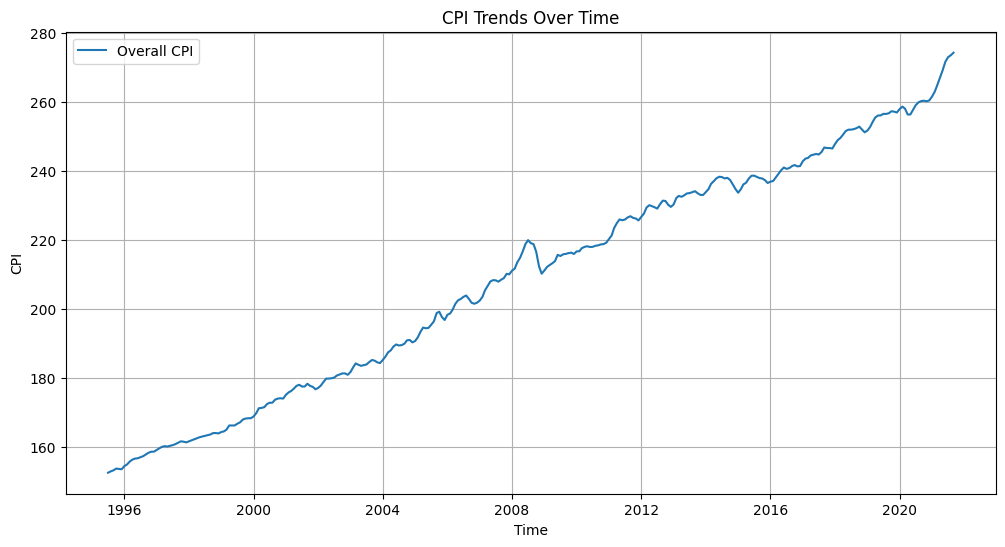

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['time'],df['overall'], label='Overall CPI')
plt.title('CPI Trends Over Time')
plt.xlabel('Time')
plt.ylabel('CPI')
plt.grid(True)
plt.legend()
plt.show()

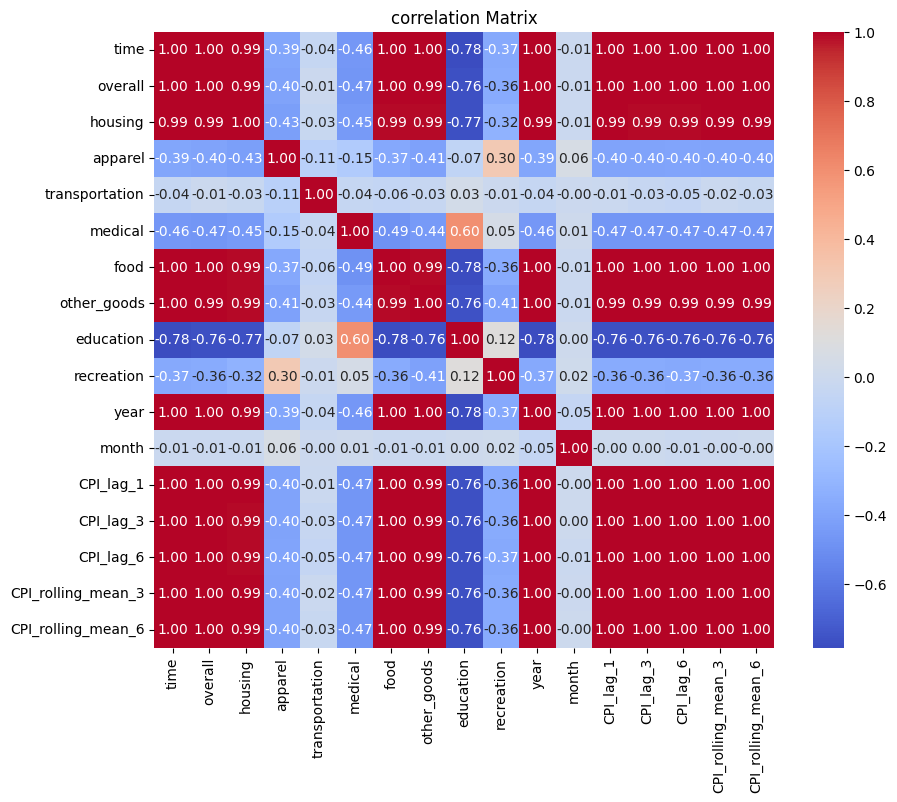

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation Matrix')
plt.show()

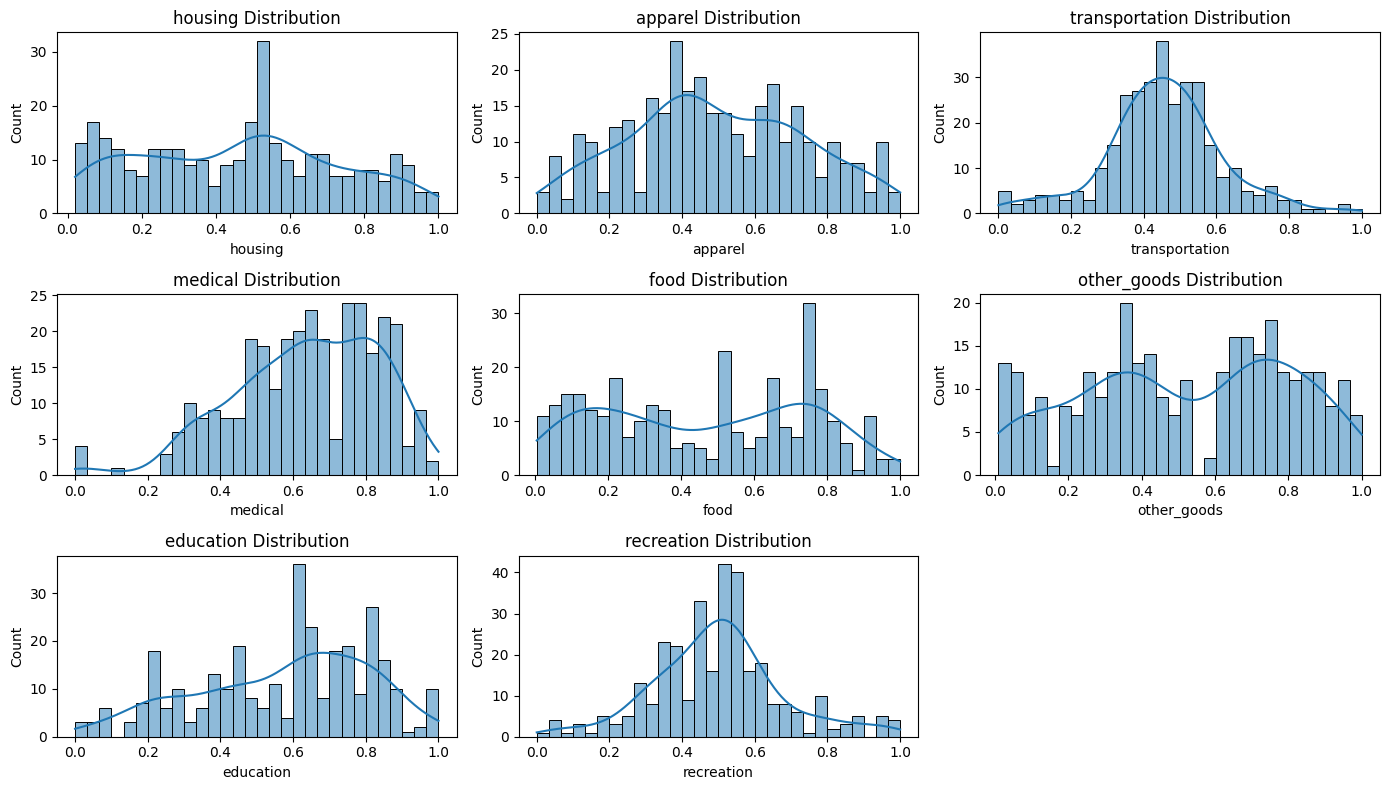

In [ ]:
components = ['housing', 'apparel', 'transportation', 'medical', 'food', 'other_goods', 'education', 'recreation']

plt.figure(figsize=(14,8))
for i, component in enumerate(components, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[component], kde=True, bins=30)
    plt.title(f'{component} Distribution')

plt.tight_layout()
plt.show()


<ipython-input-74-9ab3fdc38354>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_cpi.index, y=monthly_cpi.values, palette='viridis')


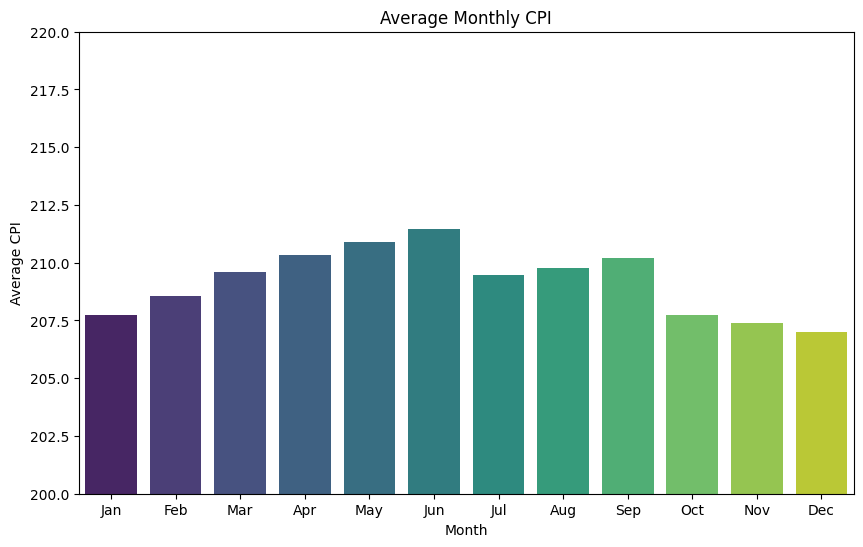

In [ ]:
monthly_cpi = df.groupby('month')['overall'].mean().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=monthly_cpi.index, y=monthly_cpi.values, palette='viridis')

plt.title('Average Monthly CPI')
plt.xlabel('Month')
plt.ylabel('Average CPI')

plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylim(200,220)
plt.show()


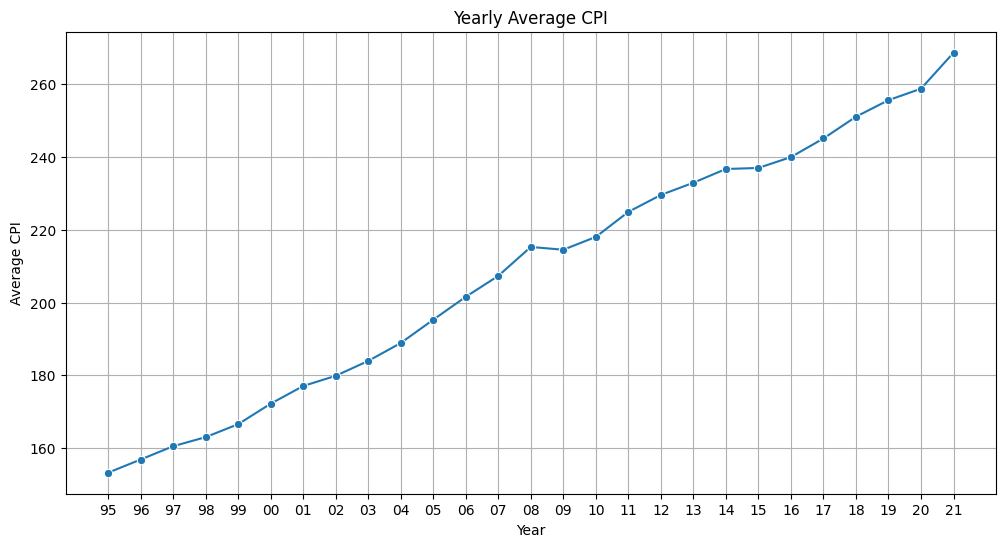

In [ ]:
yearly_cpi = df.groupby('year')['overall'].mean()
plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_cpi.index, y=yearly_cpi.values,marker='o')
plt.title('Yearly Average CPI')
plt.xlabel('Year')
plt.ylabel('Average CPI')
plt.xticks(ticks=yearly_cpi.index, labels=[str(year)[-2:] for year in yearly_cpi.index])
plt.grid(True)
plt.show()


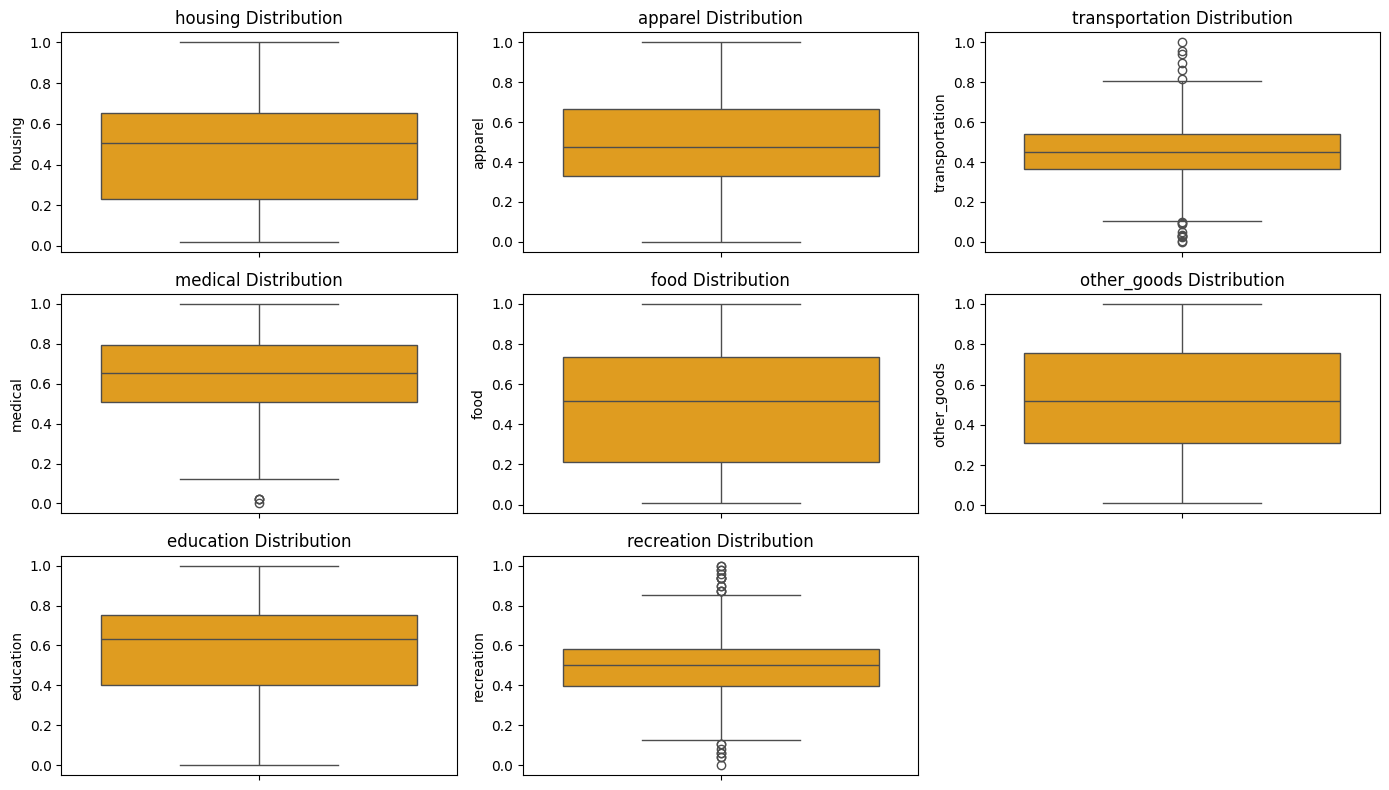

In [ ]:
plt.figure(figsize=(14,8))
for i,component in enumerate(components,1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[component],color='orange')
    plt.title(f'{component} Distribution')
plt.tight_layout()
plt.show()

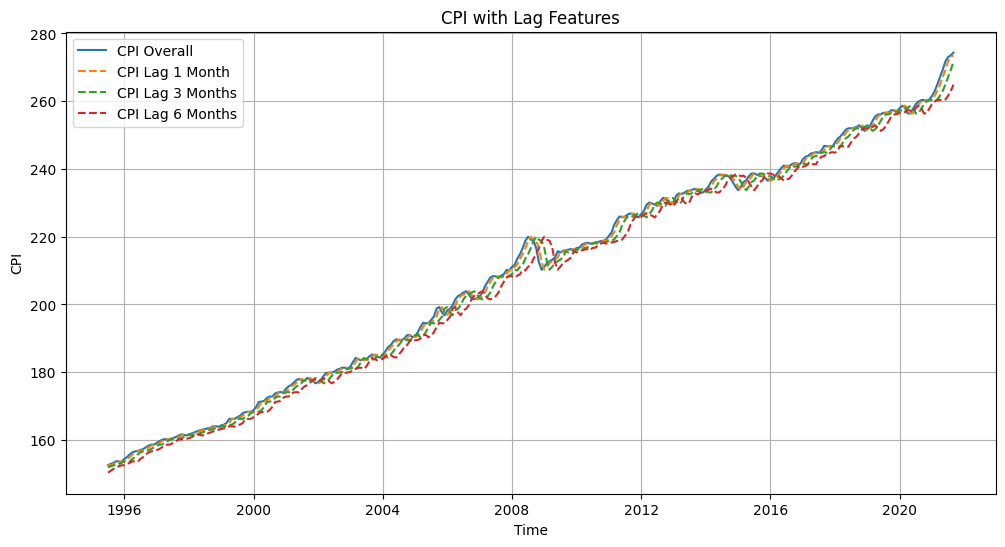

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['time'], df['overall'], label='CPI Overall')
plt.plot(df['time'], df['CPI_lag_1'], label='CPI Lag 1 Month', linestyle='--')
plt.plot(df['time'], df['CPI_lag_3'], label='CPI Lag 3 Months', linestyle='--')
plt.plot(df['time'], df['CPI_lag_6'], label='CPI Lag 6 Months', linestyle='--')
plt.title('CPI with Lag Features')
plt.xlabel('Time')
plt.ylabel('CPI')
plt.legend()
plt.grid(True)
plt.show()


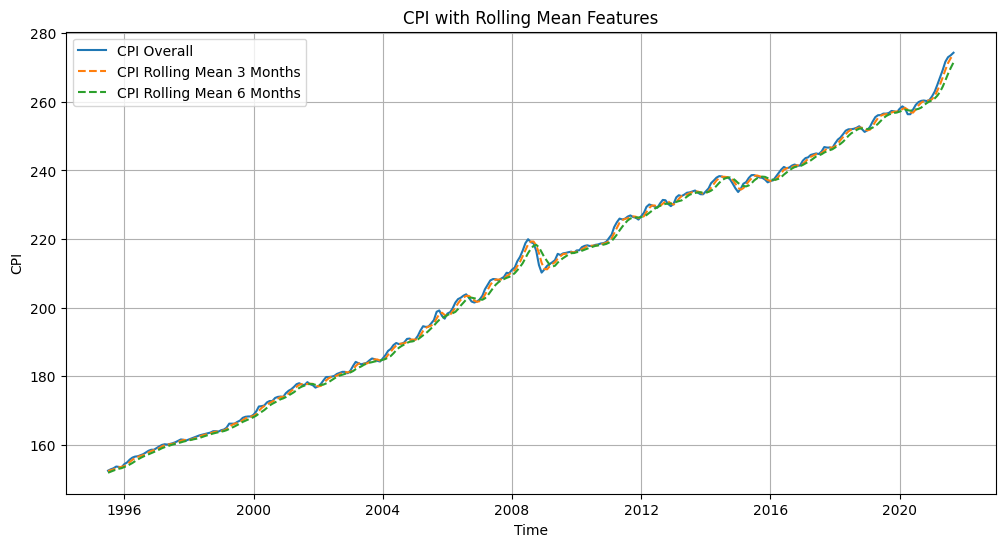

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['time'], df['overall'], label='CPI Overall')
plt.plot(df['time'], df['CPI_rolling_mean_3'], label='CPI Rolling Mean 3 Months', linestyle='--')
plt.plot(df['time'], df['CPI_rolling_mean_6'], label='CPI Rolling Mean 6 Months', linestyle='--')
plt.title('CPI with Rolling Mean Features')
plt.xlabel('Time')
plt.ylabel('CPI')
plt.legend()
plt.grid(True)
plt.show()


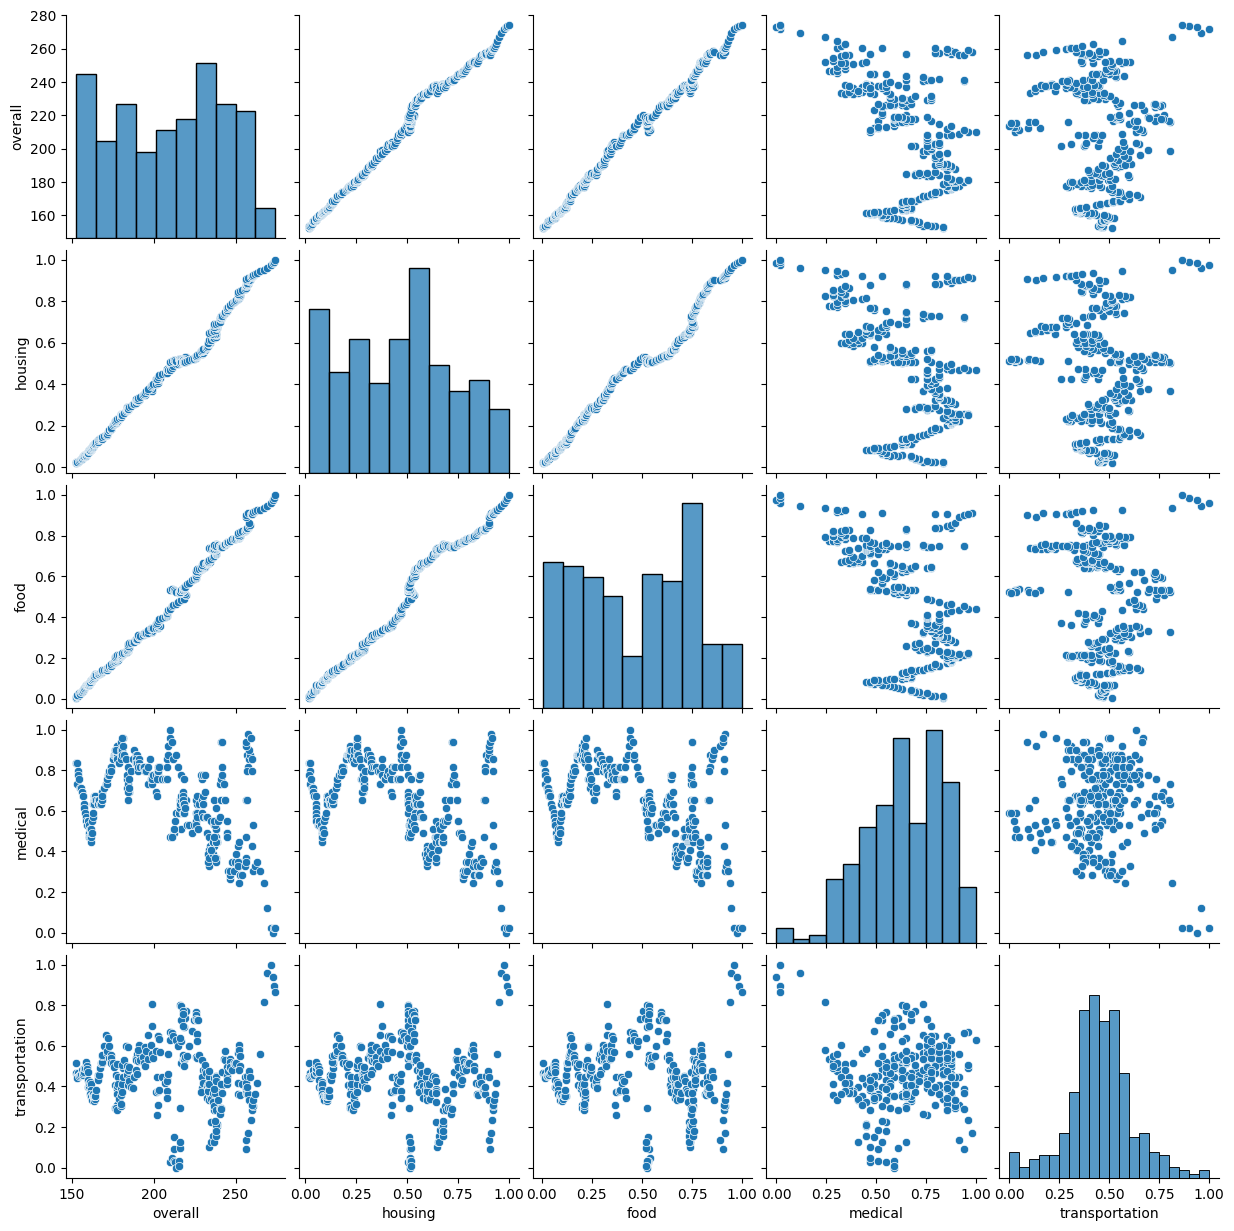

In [ ]:
sns.pairplot(df[['overall', 'housing', 'food', 'medical', 'transportation']])
plt.show()

In [ ]:
df.head(2)

,time,overall,housing,apparel,transportation,medical,food,other_goods,education,recreation,year,month,CPI_lag_1,CPI_lag_3,CPI_lag_6,CPI_rolling_mean_3,CPI_rolling_mean_6
6,1995-07-01,152.5,0.020387,0.654867,0.513966,0.836735,0.005220,0.009764,0.738462,0.625000,1995,7,152.5,151.9,150.3,152.400000,151.900000
7,1995-08-01,152.9,0.023299,0.734513,0.466480,0.836735,0.007457,0.016997,0.784615,0.729167,1995,8,152.5,152.2,150.9,152.633333,152.233333


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 6 to 320
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                315 non-null    datetime64[ns]
 1   overall             315 non-null    float64       
 2   housing             315 non-null    float64       
 3   apparel             315 non-null    float64       
 4   transportation      315 non-null    float64       
 5   medical             315 non-null    float64       
 6   food                315 non-null    float64       
 7   other_goods         315 non-null    float64       
 8   education           315 non-null    float64       
 9   recreation          315 non-null    float64       
 10  year                315 non-null    int32         
 11  month               315 non-null    int32         
 12  CPI_lag_1           315 non-null    float64       
 13  CPI_lag_3           315 non-null    float64       
 14 

# Models

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=490.230, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=571.781, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=499.820, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=497.138, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=619.939, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=488.438, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=487.205, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=488.184, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=491.042, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=481.583, Time=0.57 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=482.815, Time=0.81 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=483.362, Time=2.32 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=489.445, Time=0.49 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=485.583, Time=2.00 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=inf, 

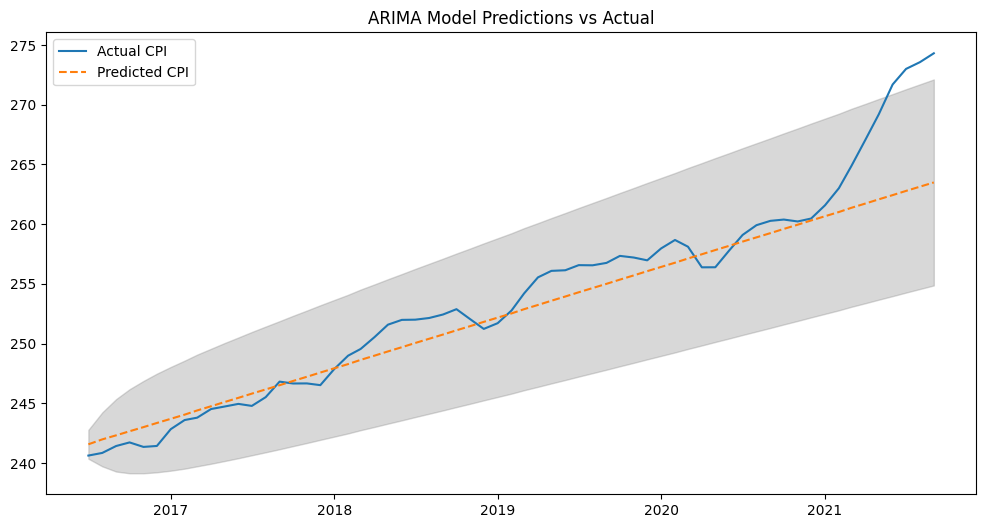

In [ ]:

!pip install pmdarima

import pmdarima as pm
from sklearn.metrics import mean_squared_error
df.set_index('time', inplace=True)

train_size = int(len(df) * 0.8)
train, test = df['overall'][:train_size], df['overall'][train_size:]

arima_model = pm.auto_arima(train, seasonal=False, trace=True)

forecast, conf_int = arima_model.predict(n_periods=len(test), return_conf_int=True)

mse = mean_squared_error(test, forecast)
print(f'ARIMA Model MSE: {mse}')
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Actual CPI')
plt.plot(test.index, forecast, label='Predicted CPI', linestyle='--')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='grey', alpha=0.3)
plt.title('ARIMA Model Predictions vs Actual')
plt.legend()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=11.09 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=571.781, Time=0.14 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=490.004, Time=1.46 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=489.970, Time=1.74 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=619.939, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=497.138, Time=0.88 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=7.81 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=483.991, Time=2.01 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=441.732, Time=7.29 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=446.163, Time=6.20 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=442.262, Time=1.76 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=503.498, Time=1.46 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=440.625, Time=3.10 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=481.208, Time=0.92 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : A

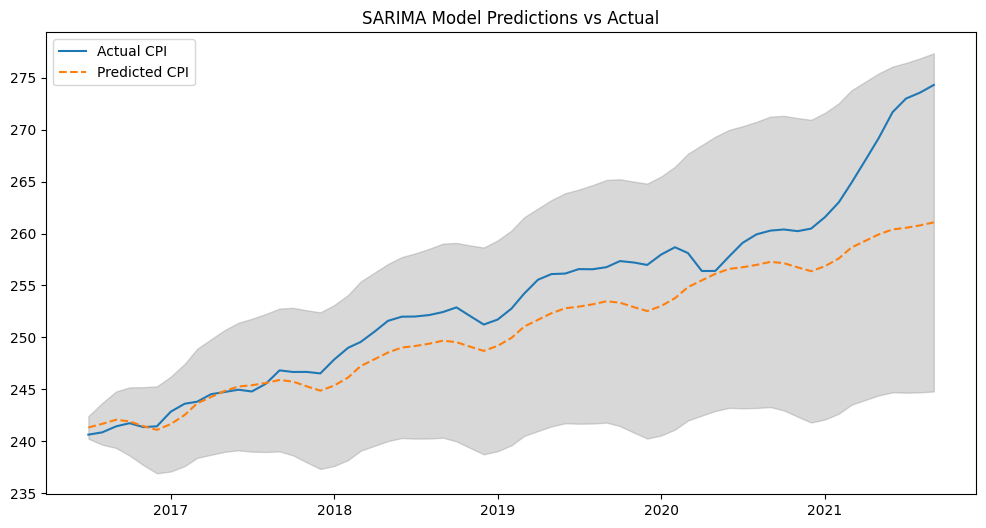

In [ ]:
sarima_model = pm.auto_arima(train, seasonal=True, m=12, trace=True)

sarima_forecast, sarima_conf_int = sarima_model.predict(n_periods=len(test), return_conf_int=True)

sarima_mse = mean_squared_error(test, sarima_forecast)
print(f'SARIMA Model MSE: {sarima_mse}')

plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Actual CPI')
plt.plot(test.index, sarima_forecast, label='Predicted CPI', linestyle='--')
plt.fill_between(test.index, sarima_conf_int[:, 0], sarima_conf_int[:, 1], color='grey', alpha=0.3)
plt.title('SARIMA Model Predictions vs Actual')
plt.legend()
plt.show()


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1730
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1032 
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0439  
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169  
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024 
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028  
Epoch 13/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022 
Epoch 14/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 
Epoch 15/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025  
Epoch 16/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7m

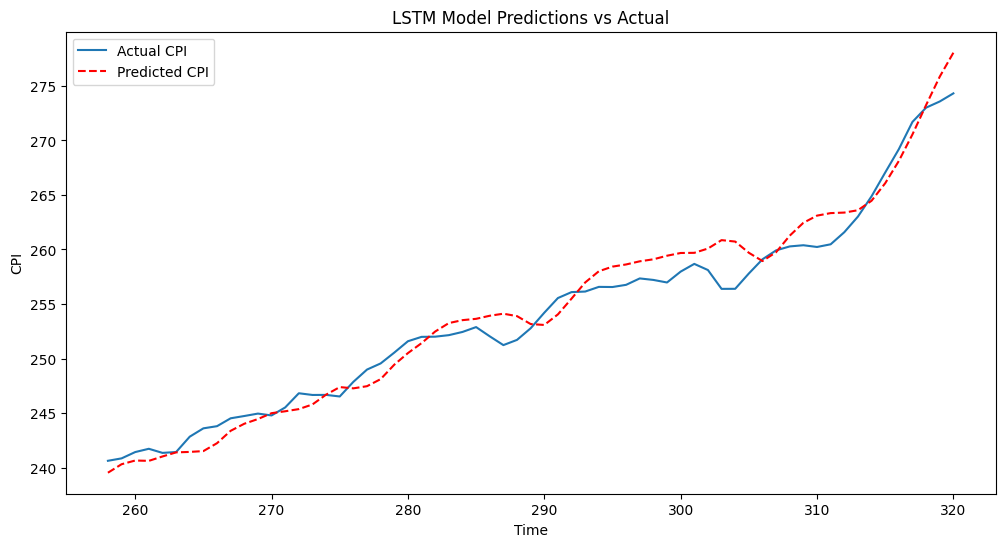

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

X_lstm = np.array([y_scaled[i-3:i] for i in range(3, len(y_scaled))])
y_lstm = np.array([y_scaled[i] for i in range(3, len(y_scaled))])

train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

lstm_model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32)

lstm_pred = lstm_model.predict(X_test_lstm)

lstm_pred_inverse = scaler.inverse_transform(lstm_pred)
y_test_lstm_inverse = scaler.inverse_transform(y_test_lstm)

lstm_mse = mean_squared_error(y_test_lstm_inverse, lstm_pred_inverse)
print(f'LSTM Model MSE: {lstm_mse}')

plt.figure(figsize=(12, 6))
plt.plot(y.index[-len(y_test_lstm):], y.values[-len(y_test_lstm):], label='Actual CPI')
plt.plot(y.index[-len(lstm_pred_inverse):], lstm_pred_inverse, label='Predicted CPI', linestyle='--', color='red')
plt.title('LSTM Model Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('CPI')
plt.legend()
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.head(2)

,overall,housing,apparel,transportation,medical,food,other_goods,education,recreation,year,month,CPI_lag_1,CPI_lag_3,CPI_lag_6,CPI_rolling_mean_3,CPI_rolling_mean_6
time,,,,,,,,,,,,,,,,
1995-07-01,152.5,0.020387,0.654867,0.513966,0.836735,0.005220,0.009764,0.738462,0.625000,1995,7,152.5,151.9,150.3,152.400000,151.900000
1995-08-01,152.9,0.023299,0.734513,0.466480,0.836735,0.007457,0.016997,0.784615,0.729167,1995,8,152.5,152.2,150.9,152.633333,152.233333


Mean Squared Error (MSE): 0.5630609926845674
R² Score: 0.9922375974191274


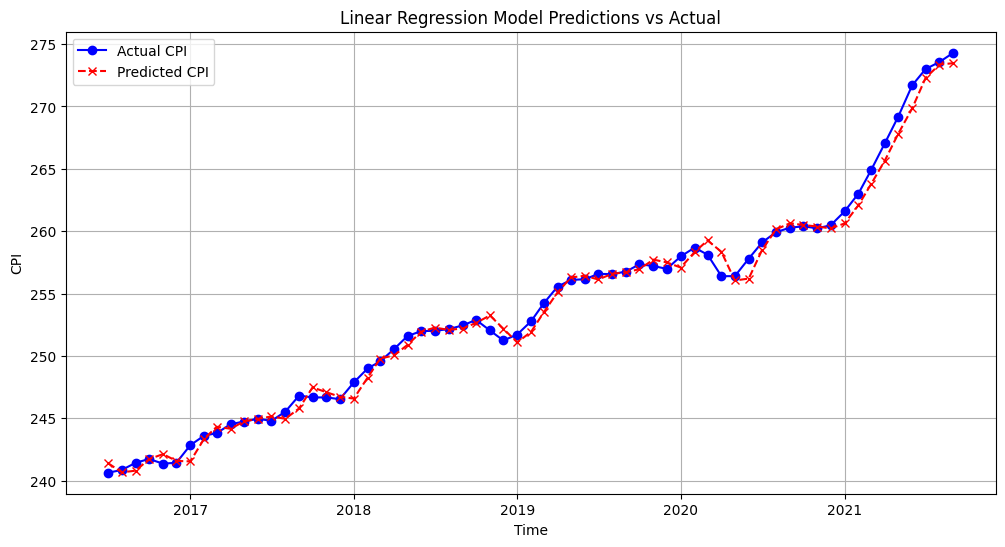

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
X = df[['CPI_lag_1',	'CPI_lag_3',	'CPI_lag_6']]
y = df['overall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual CPI', marker='o', linestyle='-', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted CPI', marker='x', linestyle='--', color='red')
plt.title('Linear Regression Model Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('CPI')
plt.legend()
plt.grid(True)
plt.show()